Importing Required Library

In [87]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

File paths to be imported

In [88]:
feat_file_paths = ["datasets/twitter/12831.feat", "datasets/twitter/78813.feat", "datasets/twitter/356963.feat"]

Generating Common Features

In [89]:
# Initialize an empty set to store common features
common_features_set = set()
common_features_set_initialised = 0
# Iterate through the file paths
for file_path in feat_file_paths:
    with open(file_path + "names", 'r',encoding="utf8") as file:
        dataset = file.read().splitlines()
        features = set(item.split(' ')[1] for item in dataset)
        if common_features_set_initialised==0:
            # If it's the first dataset, set common_features_set to the features of the first dataset
            common_features_set = features
            common_features_set_initialised = 1
        else:
            # Find the intersection with the common features
            common_features_set = common_features_set.intersection(features)

# Create a new dataset with common features and new index numbers
new_common_features_dataset = []
for index, feature in enumerate(common_features_set):
    new_common_features_dataset.append(feature)

# Print the new dataset
for index,item in enumerate(new_common_features_dataset):
    print(index,item)

0 #iPad
1 @wilw:
2 @...
3 @the
4 #fb
5 @twitter
6 @anildash
7 @Twitter
8 @mashable:
9 @BarackObama:
10 @foursquare!
11 @chockenberry
12 #FF
13 #1
14 @The
15 #winning
16 @mashable
17 @BorowitzReport:
18 @timoreilly:
19 #NYC
20 @codinghorror
21 @nytimes


Initialising node with features

In [90]:
class Node:
    def __init__(self, node_number, features):
        self.node_number = node_number
        self.features = features

    def __str__(self):
        return f"Node {self.node_number}: {self.features}"

# Initialize an empty dictionary to store the extracted nodes
nodes_dict = {}
nodes_list = []
no_nodes_repeated = 0
# Loop through the list of .feat file paths
for feat_file_path in feat_file_paths:
    # Open and read the .feat file
    #Reading Featname into a dictionary
    # Initialize an empty dictionary
    key_value_dict = {}

    # Read the dataset from the text file
    with open(feat_file_path+"names", 'r', encoding="utf8") as file:
        for line in file:
            parts = line.strip().split(' ')
            if len(parts) == 2:
                key = parts[1]
                value = parts[0]
                key_value_dict[key] = value
    with open(feat_file_path, "r") as feat_file:
        for line in feat_file:
            # Split the line into values using space as a separator
            values = line.strip().split()

            # The first value is the node number
            node_number = int(values[0])

            # The remaining values are feature indicators (0 or 1)
            # features = list(map(int, values[1:]))
            features=[]
        
            for i in new_common_features_dataset:
                features.append(int(values[int(key_value_dict[i])+1]))            

            # Create a Node instance and append it to the list
            node = Node(node_number, features)
            if node_number in nodes_dict.keys():
                if node.features == nodes_dict[node_number].features :
                    no_nodes_repeated += 1
            nodes_dict[node_number] = node
            nodes_list.append(node_number)
print("No. of nodes repeated : ", no_nodes_repeated)


No. of nodes repeated :  5


Generating adjacency matrix

In [91]:
# Just fo visualising
def edges_to_adjacency_matrices(file_paths):
    adjacency_matrices = []
    edges = []
    for file_path in file_paths:
        # Read edges from the text file
        with open(file_path, 'r') as file:
            edges.extend([line.strip().split() for line in file])

    # Create an featureatrix
    num_nodes = len(nodes_list)
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for edge in edges:
        node1, node2 = edge
        index1, index2 = nodes_list.index(int(node1)), nodes_list.index(int(node2))
        adjacency_matrix[index1][index2] = 1  # Directed edge from node1 to node2
    adjacency_matrices.extend(adjacency_matrix)

    return adjacency_matrices

# Example usage with multiple input files:
edges_file_paths = ["datasets/twitter/12831.edges", "datasets/twitter/78813.edges"] # Replace with your file paths
adjacency_matrices = edges_to_adjacency_matrices(edges_file_paths)

print(len(adjacency_matrices))
print(adjacency_matrices)


619
[array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Visualising the graph

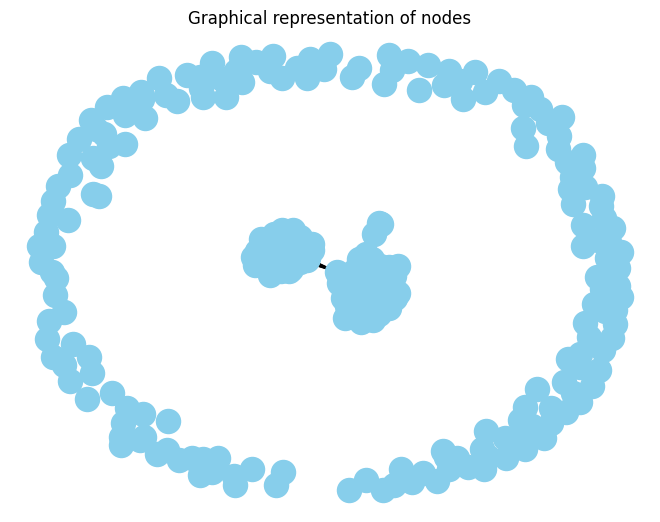

In [92]:
def display_adjacency_matrix(adjacency_matrix):
    G = nx.Graph()
    num_nodes = len(adjacency_matrix)
    
    for i in range(num_nodes):
        G.add_node(i)
    
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if adjacency_matrix[i][j] == 1:
                G.add_edge(i, j)
    
    pos = nx.spring_layout(G, seed=42)  # You can choose different layout algorithms
    
    nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=300)
    plt.title("Graphical representation of nodes")
    plt.show()

display_adjacency_matrix(adjacency_matrices)

Generating feature matrix

In [93]:
# Print the extracted nodes
print("Nodes:",len(nodes_list))

# for node in nodes_dict.keys():
    # print(nodes_dict[node].features)

feature_matrix =[]
for node in nodes_dict.keys():
    feature_matrix.append(nodes_dict[node].features)

feature_matrix = np.array(feature_matrix)
# print(feature_matrix)
for i in feature_matrix :
    print(i)

Nodes: 619
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 

Preprocessed Feature matrix

In [94]:
print("Shape of Feature Matrix : ",np.shape(feature_matrix))
print("Feature Matrix\n",feature_matrix)

Shape of Feature Matrix :  (614, 22)
Feature Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
